# Importing Libraries

In [247]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
pd.set_option('display.max_columns',None)
import matplotlib.pyplot as plt
import seaborn as sns

# Importing Data

In [248]:
city_day=pd.read_csv('D://Projects//Regression//AQI_Prediction//Data//city_day.csv')

# Data Exploration

In [249]:
city_day.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [250]:
city_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB


In [251]:
city_day.describe()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
count,24933.000000,18391.000000,25949.000000,25946.000000,25346.000000,19203.000000,27472.000000,25677.000000,25509.000000,23908.000000,21490.000000,11422.000000,24850.000000
mean,67.450578,118.127103,17.574730,28.560659,32.309123,23.483476,2.248598,14.531977,34.491430,3.280840,8.700972,3.070128,166.463581
std,64.661449,90.605110,22.785846,24.474746,31.646011,25.684275,6.962884,18.133775,21.694928,15.811136,19.969164,6.323247,140.696585
min,0.040000,0.010000,0.020000,0.010000,0.000000,0.010000,0.000000,0.010000,0.010000,0.000000,0.000000,0.000000,13.000000
25%,28.820000,56.255000,5.630000,11.750000,12.820000,8.580000,0.510000,5.670000,18.860000,0.120000,0.600000,0.140000,81.000000
50%,48.570000,95.680000,9.890000,21.690000,23.520000,15.850000,0.890000,9.160000,30.840000,1.070000,2.970000,0.980000,118.000000
75%,80.590000,149.745000,19.950000,37.620000,40.127500,30.020000,1.450000,15.220000,45.570000,3.080000,9.150000,3.350000,208.000000
max,949.990000,1000.000000,390.680000,362.210000,467.630000,352.890000,175.810000,193.860000,257.730000,455.030000,454.850000,170.370000,2049.000000


In [252]:
city_day.dropna(how='any',ignore_index=True,inplace=True,subset=['AQI','AQI_Bucket'])

In [253]:
null_values=[]
null_names=[]
for col in city_day.columns:
    if city_day[col].isnull().sum()>1:
        null_values.append(city_day[col].isnull().sum())
        null_names.append(col)
        print(col,':',city_day[col].isnull().sum(),f'({round((city_day[col].isnull().sum()/city_day.shape[0])*100,2)} %)')

PM2.5 : 678 (2.73 %)
PM10 : 7086 (28.52 %)
NO : 387 (1.56 %)
NO2 : 391 (1.57 %)
NOx : 1857 (7.47 %)
NH3 : 6536 (26.3 %)
CO : 445 (1.79 %)
SO2 : 605 (2.43 %)
O3 : 807 (3.25 %)
Benzene : 3535 (14.23 %)
Toluene : 5826 (23.44 %)
Xylene : 15372 (61.86 %)


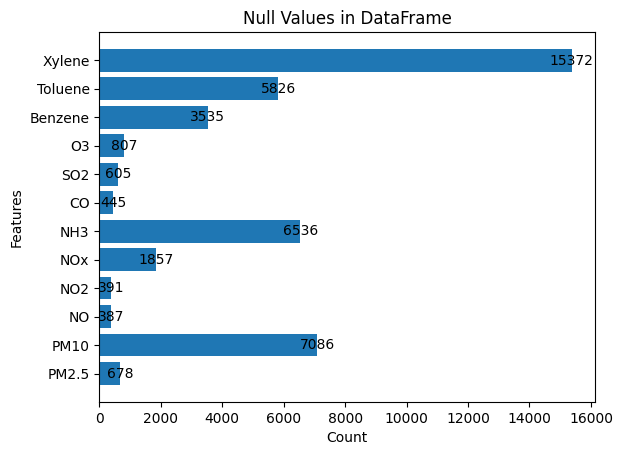

In [254]:
plt.barh(null_names, null_values)
plt.xlabel('Count')
plt.ylabel('Features')
plt.title('Null Values in DataFrame')
for i in range(len(null_values)): 
    plt.text(null_values[i], i, str(null_values[i]), color='black', ha="center", va="center")
plt.show()

# Cleaning & Preprocessing

In [255]:
city_day['Date']=pd.to_datetime(city_day['Date'])

In [256]:
city_day.tail()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
24845,Visakhapatnam,2020-06-27,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,0.73,41.0,Good
24846,Visakhapatnam,2020-06-28,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38,70.0,Satisfactory
24847,Visakhapatnam,2020-06-29,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,0.00,68.0,Satisfactory
24848,Visakhapatnam,2020-06-30,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,0.00,54.0,Satisfactory
24849,Visakhapatnam,2020-07-01,15.00,66.00,0.40,26.85,14.05,5.20,0.59,2.10,17.05,NaN,NaN,NaN,50.0,Good


In [257]:
city_day.City.nunique()

26

In [ ]:
city_day.fillna(method='ffill',inplace=True)
#We are using ffill to fill the null values because it is a time series data and it may be possible that the current value depends on previous value 

In [ ]:
city_day.isna().sum()

City             0
Date             0
PM2.5            0
NO               0
NO2              0
NH3           1334
CO               0
SO2              0
O3               0
Toluene          0
Xylene           0
AQI              0
AQI_Bucket       0
dtype: int64

In [ ]:
city_day['NH3'].fillna(city_day['NH3'].mean(),inplace=True)
# We used mean to fill NH3 because starting values were null

In [ ]:
city_day.isna().sum()

City          0
Date          0
PM2.5         0
NO            0
NO2           0
NH3           0
CO            0
SO2           0
O3            0
Toluene       0
Xylene        0
AQI           0
AQI_Bucket    0
dtype: int64

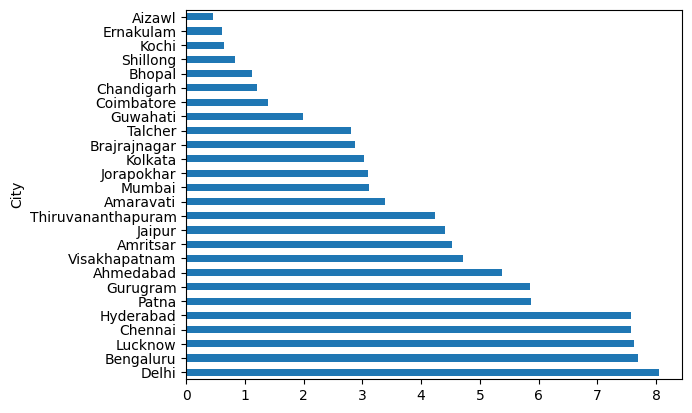

In [ ]:
((city_day['City'].value_counts()/city_day.shape[0])*100).plot(kind='barh')
plt.show()

- Rows with Aizawl,Ernakulam,Kochi,Shillong as they have less than 1% of data

In [ ]:
# To run this, change cell type to Code
for city in ['Aizawl','Ernakulam','Kochi','Shillong']:
    city_day=city_day[city_day['City']!=city]

# EDA

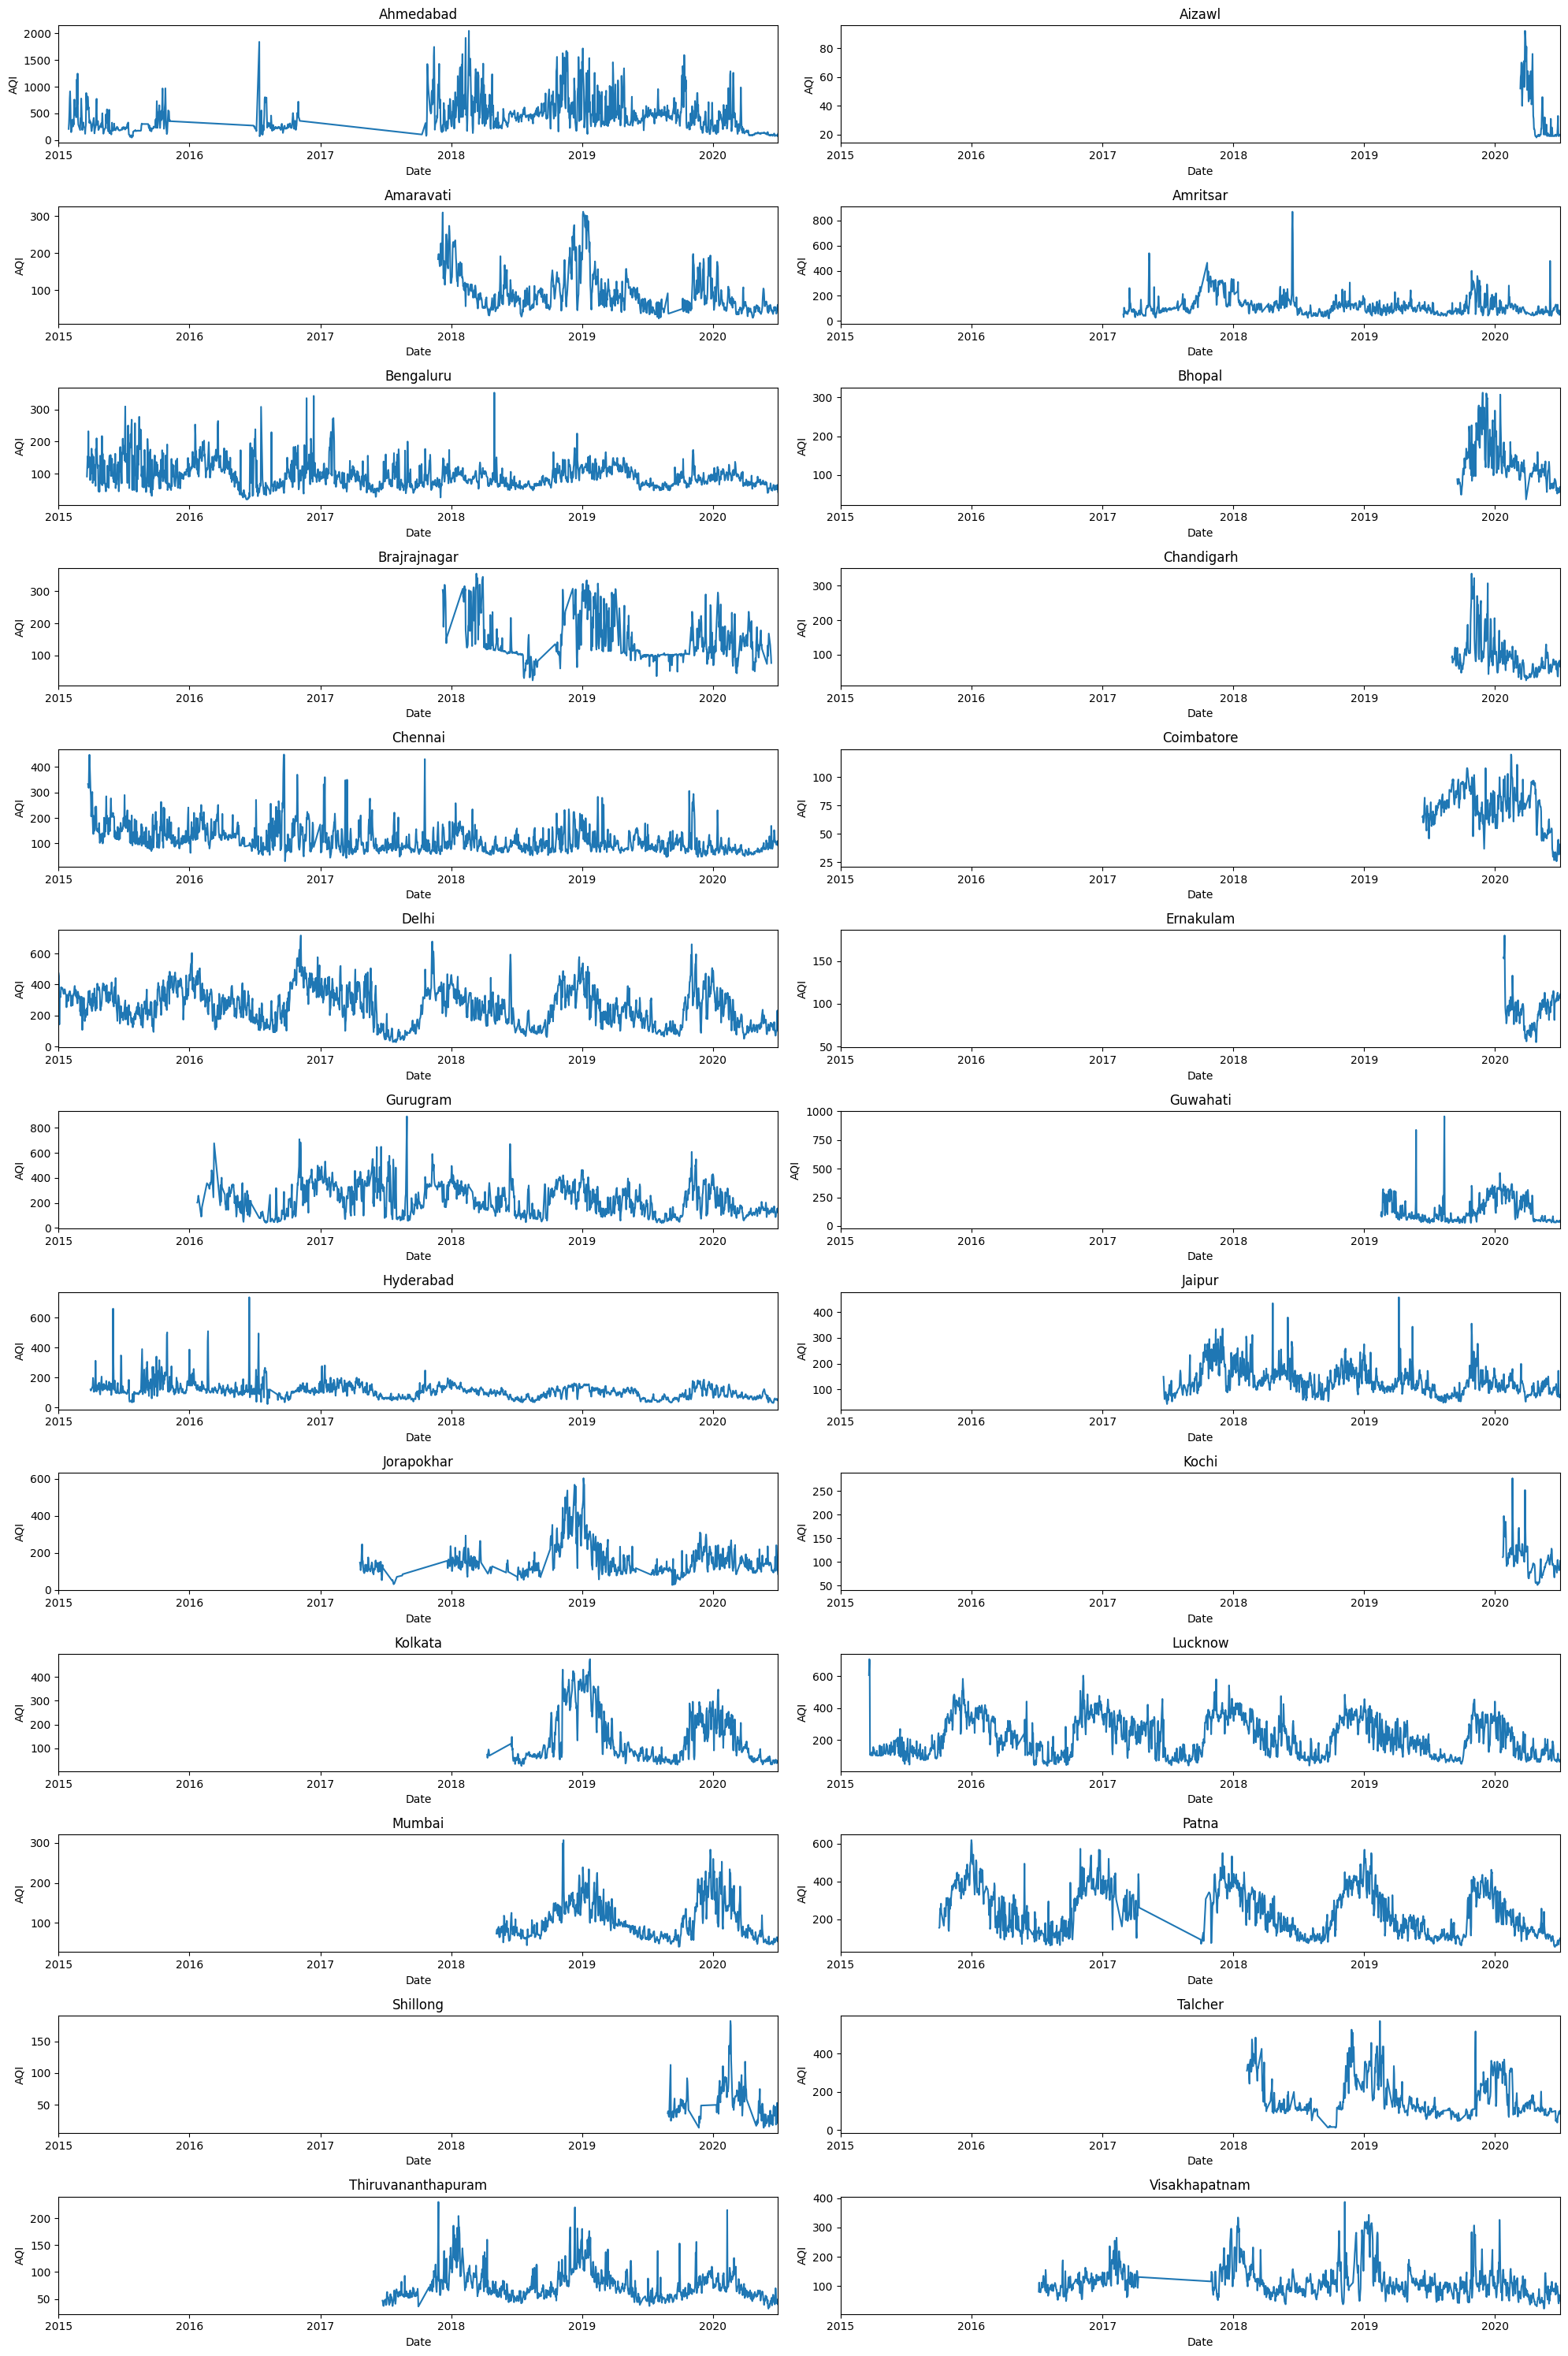

In [258]:
plt.figure(figsize=(20, 30))
for index,city in enumerate(city_day['City'].unique()):
    plt.subplot(13,2 , index+1)
    sns.lineplot(data=city_day[city_day['City']==city],x='Date',y='AQI')
    plt.title(city)
    plt.xlim(city_day['Date'].min(), city_day['Date'].max())
plt.tight_layout()
plt.show()

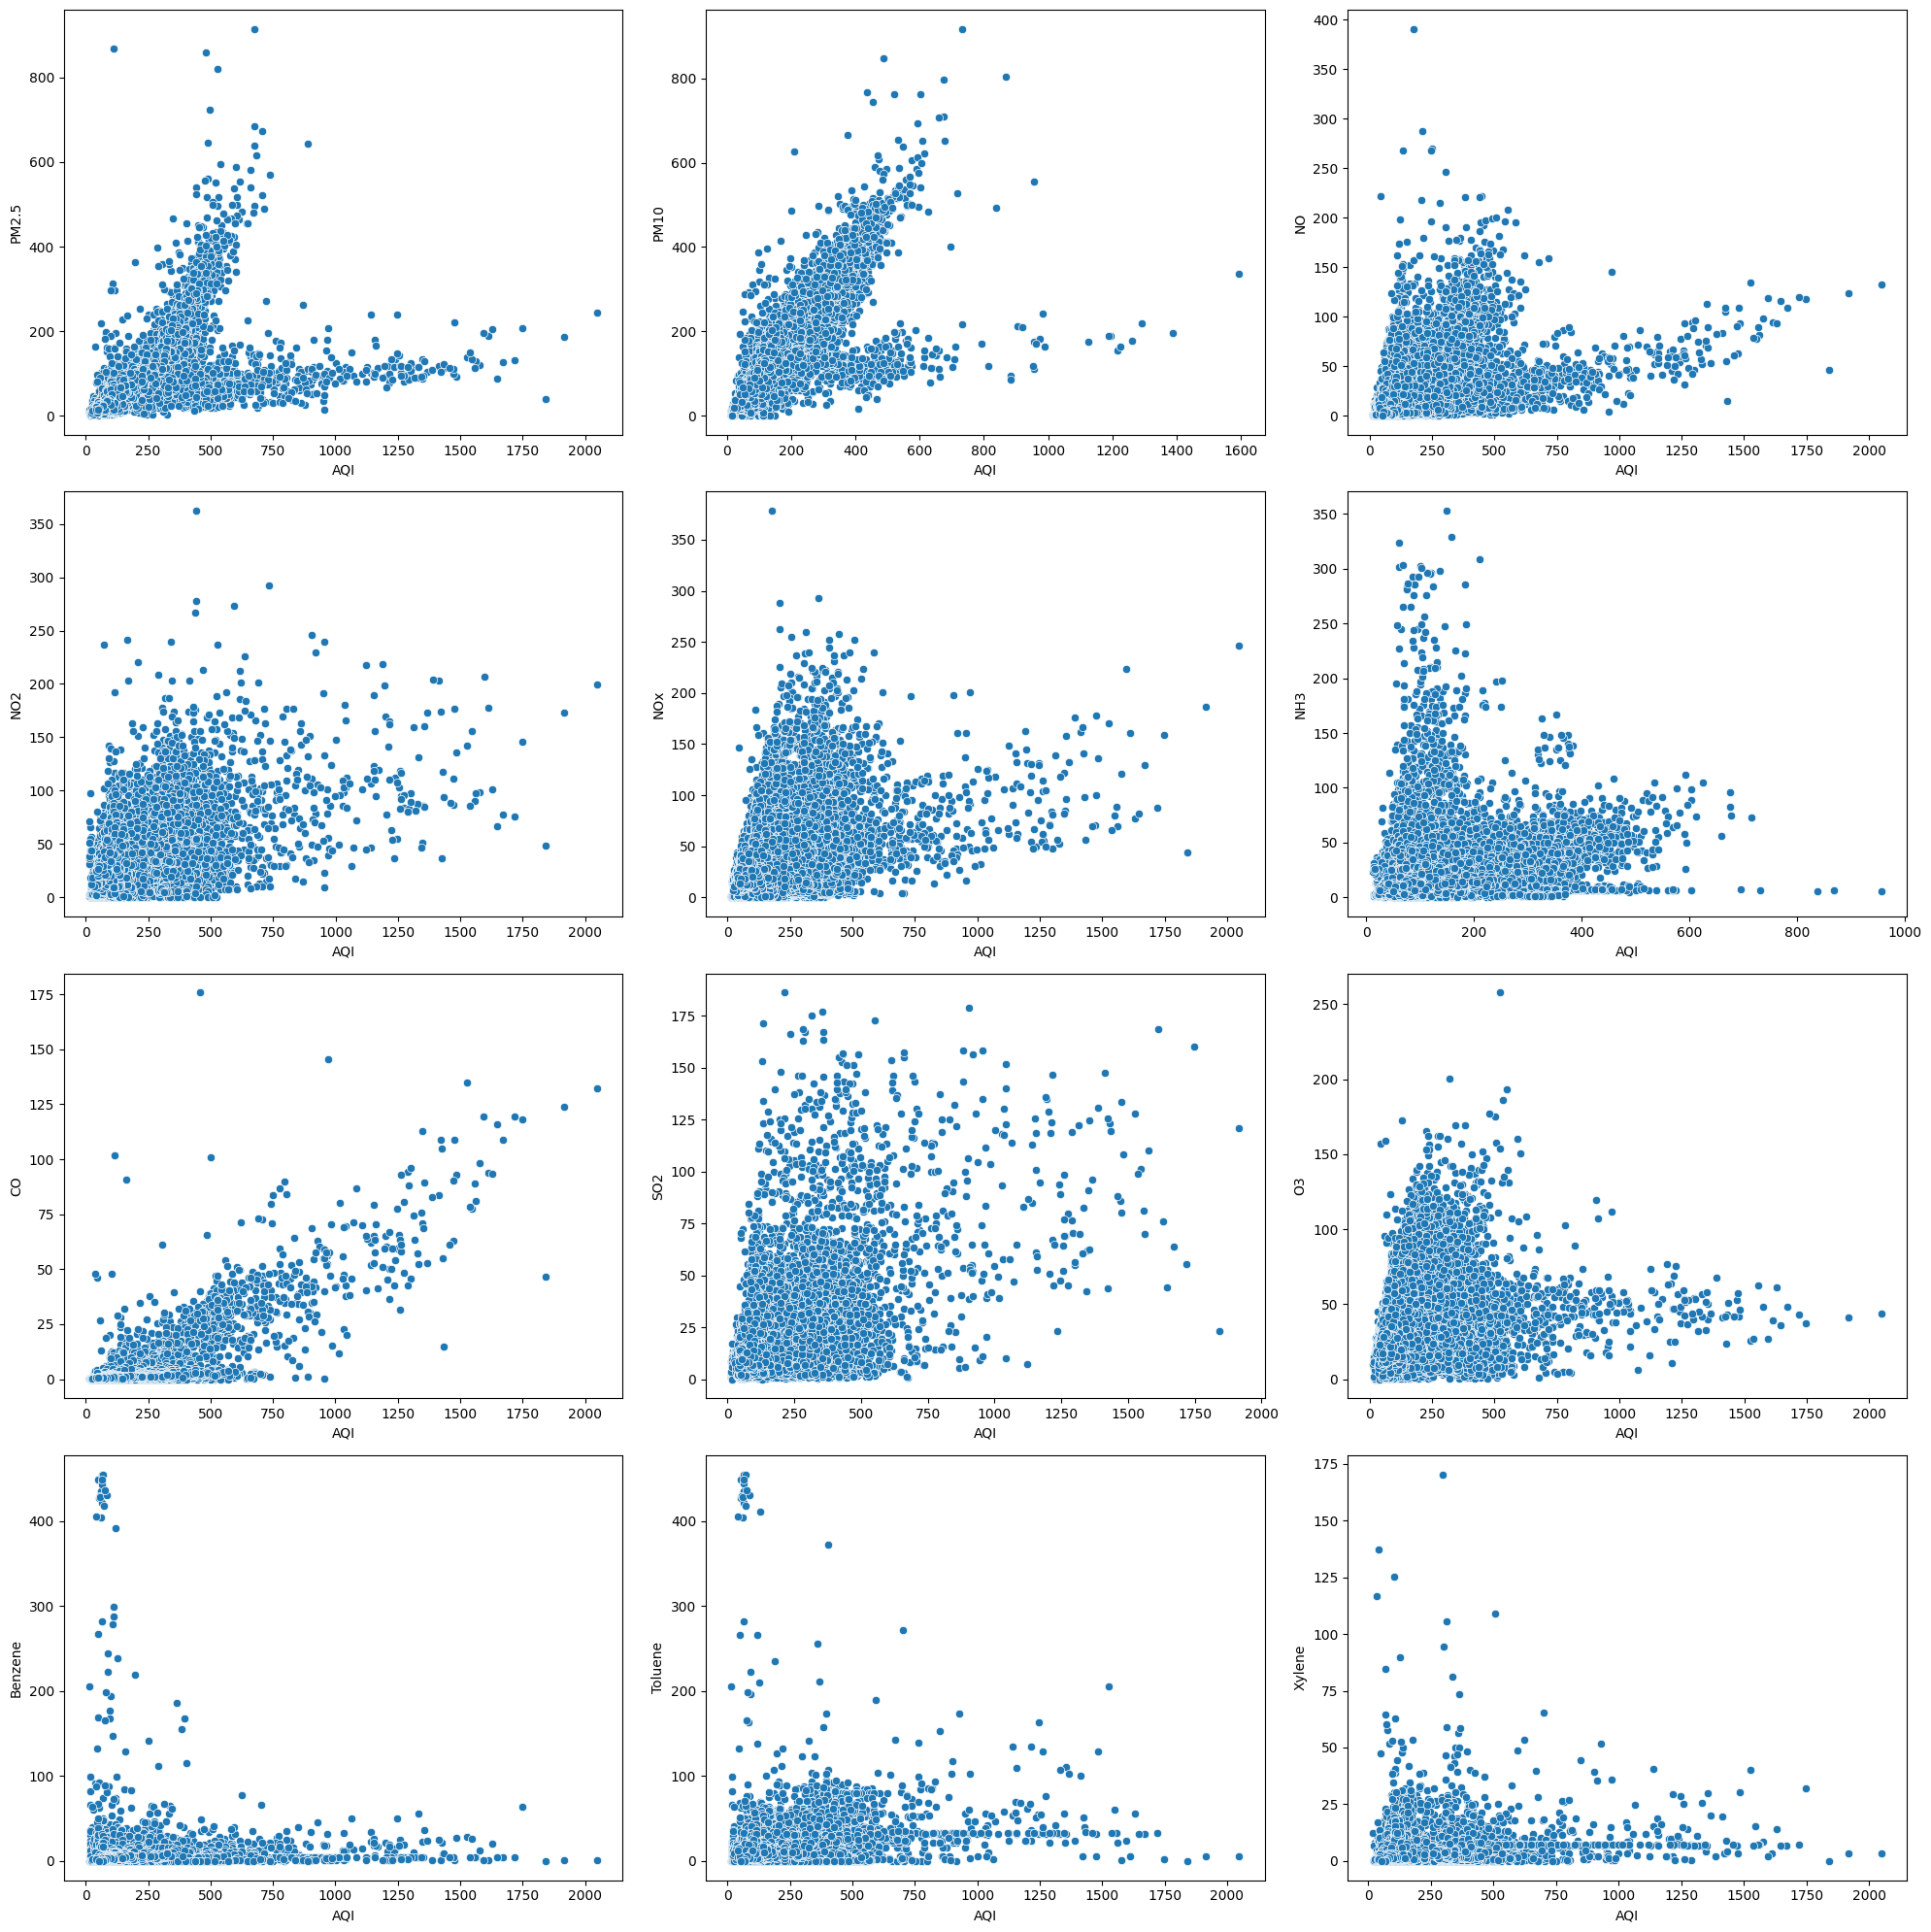

In [259]:
plt.figure(figsize=(20,20))
for index,col in zip(range(12),[col for col in city_day.columns if city_day[col].dtypes=='float64' and col!='AQI']):
    plt.subplot(4,3,index+1)
    if city_day[col].dtypes=='float64' and col!='AQI':
        sns.scatterplot(data=city_day,y=col,x='AQI')
plt.tight_layout()
plt.show()

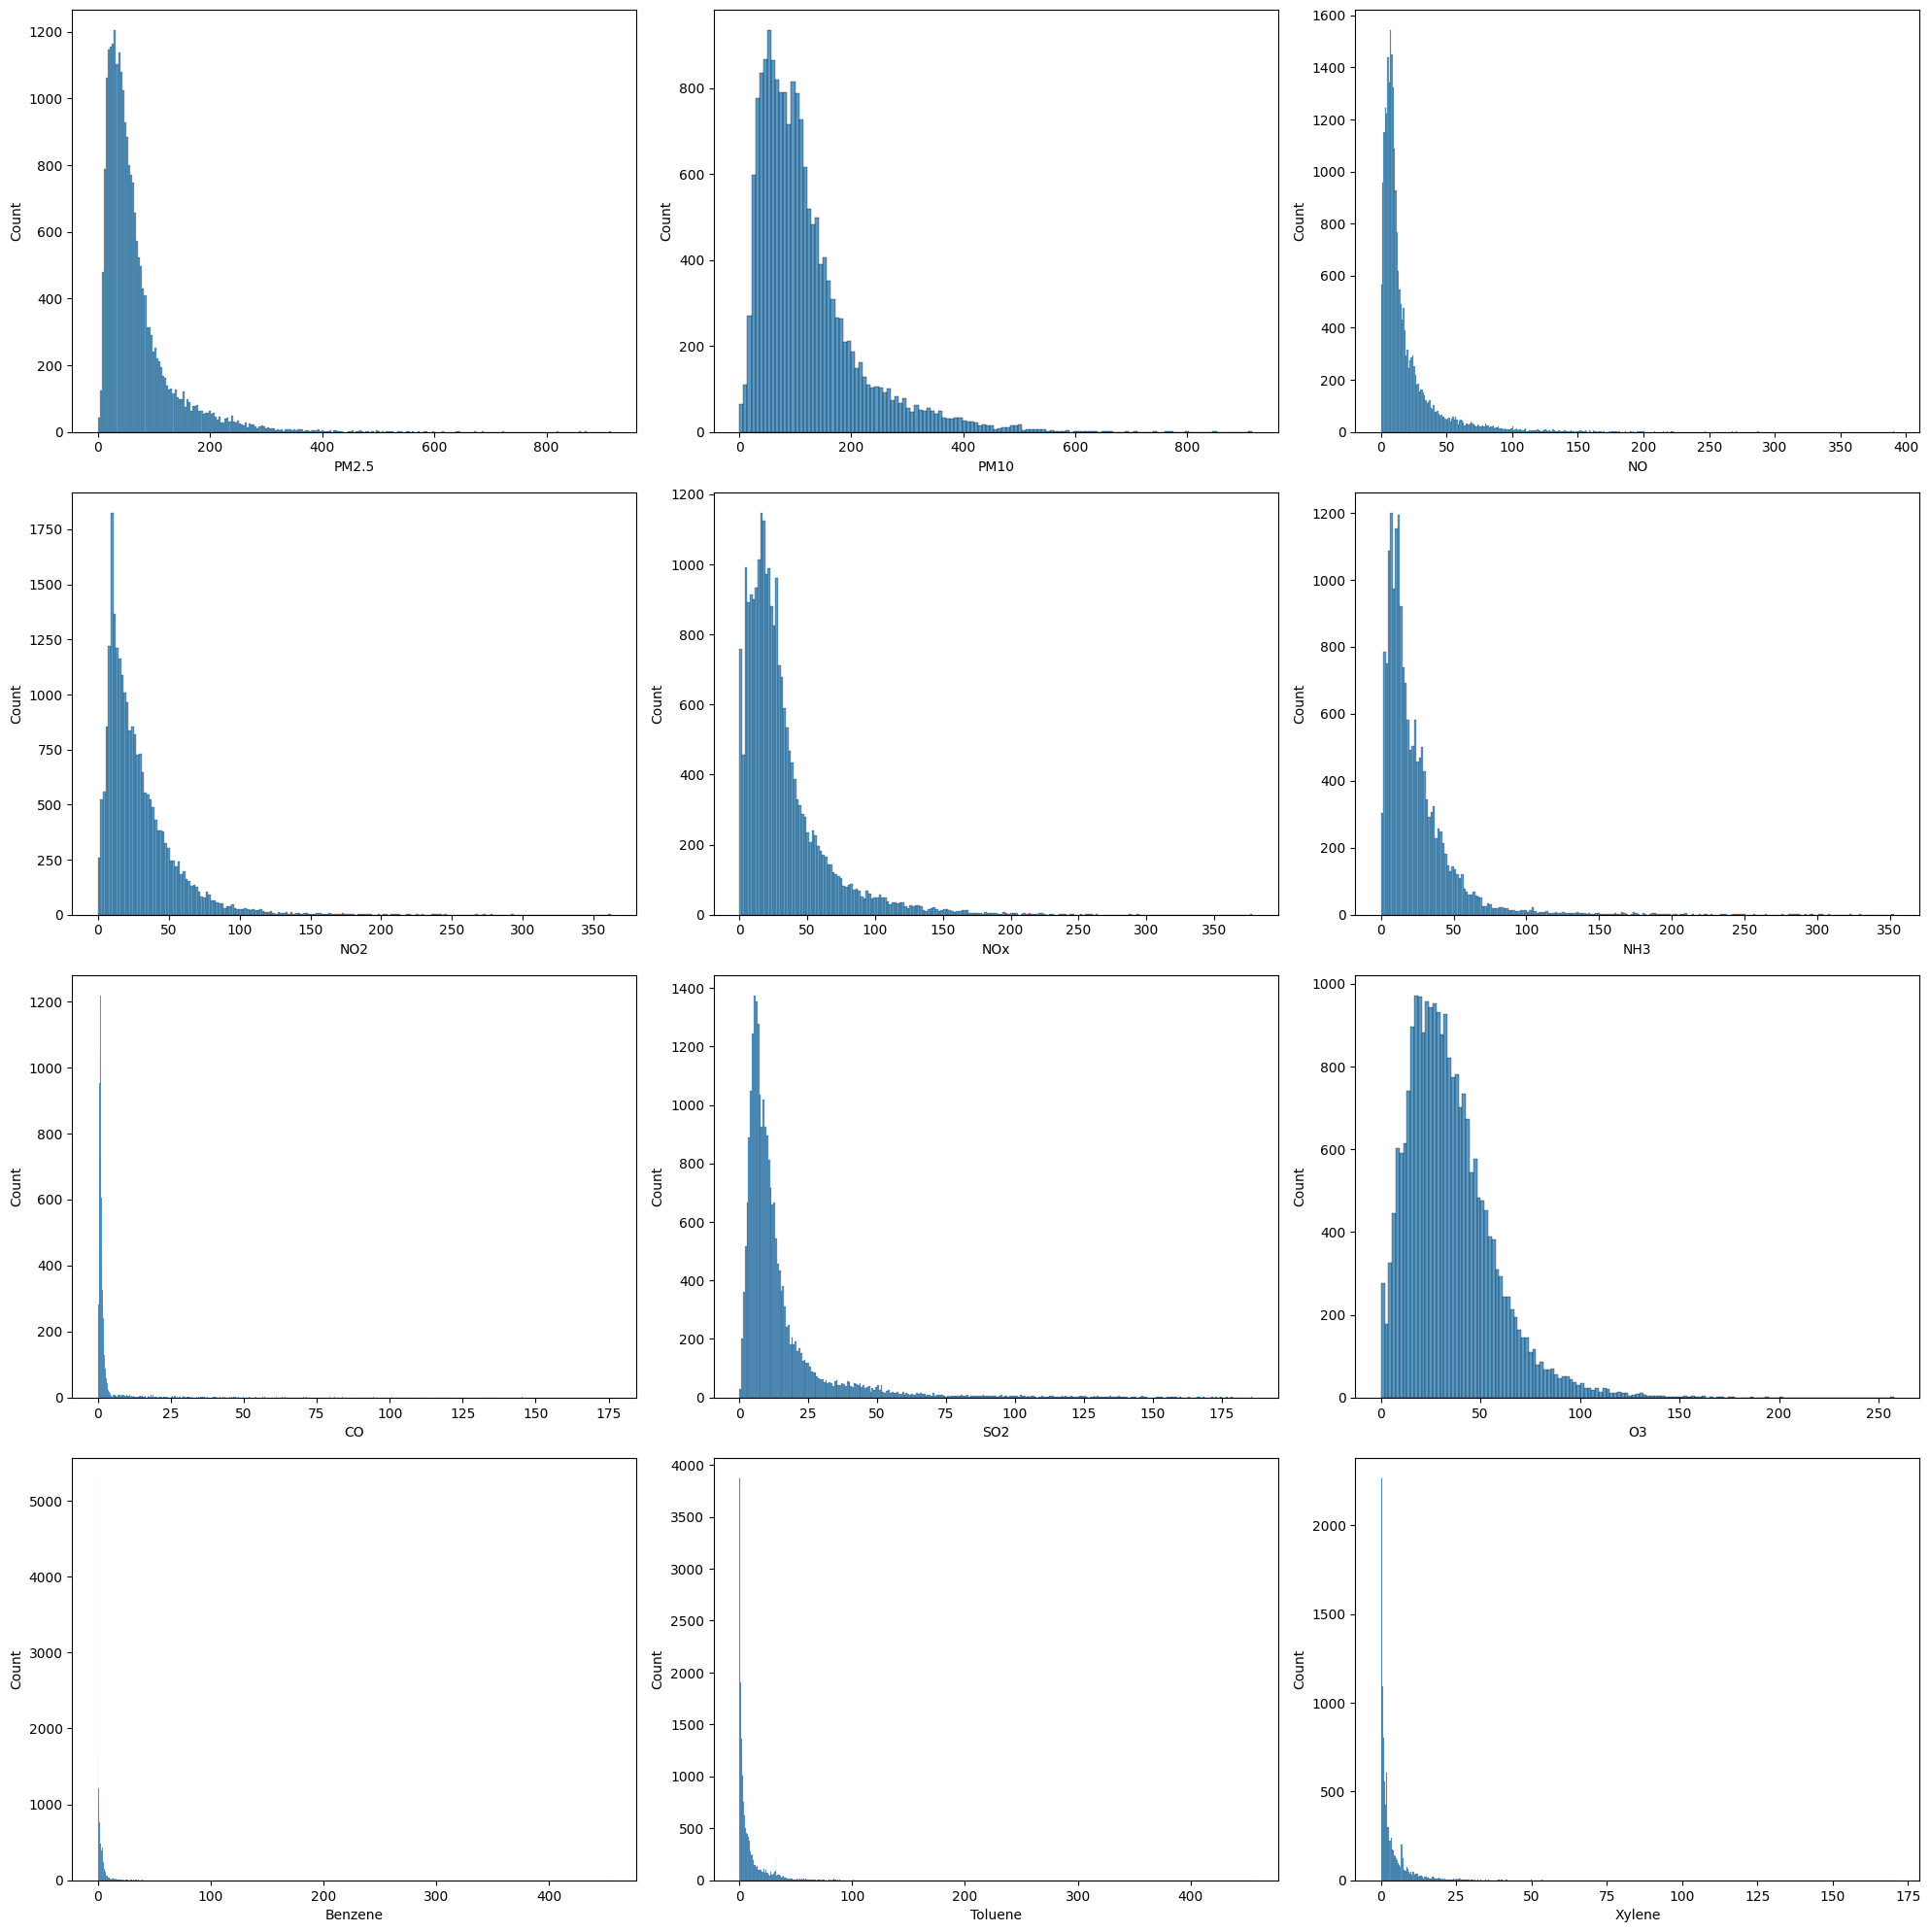

In [260]:
plt.figure(figsize=(20,20))
for index,col in zip(range(12),[col for col in city_day.columns if city_day[col].dtypes=='float64' and col!='AQI']):
    plt.subplot(4,3,index+1)
    sns.histplot(data=city_day,x=col)
plt.tight_layout()
plt.show()

- It shows that every column (continous feature) is Right tailed or Positively Skewed which means they have outliers in right (high values)

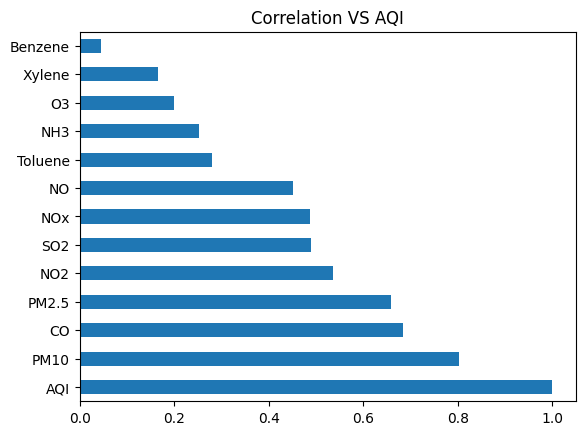

In [261]:
city_day.iloc[:,2:-1].corr()['AQI'].sort_values(ascending=False).plot(kind='barh')
plt.title('Correlation VS AQI')
plt.show()

In [262]:
corr=city_day.drop(['City','AQI_Bucket'],axis=1).corr()
indexes=[]
cols=[]
for index in corr.index:
    for col in corr.columns:
        if index!='AQI' and col!='AQI':
            if index!=col:
                if corr.loc[index,col]>0.6:
                    indexes.append(index)
                    cols.append(col)
                    print(index,col,corr.loc[index,col])

PM2.5 PM10 0.8531997687604501
PM10 PM2.5 0.8531997687604501
NO NOx 0.8013451280697714
NO2 NOx 0.6338374276785882
NOx NO 0.8013451280697714
NOx NO2 0.6338374276785882
Benzene Toluene 0.7642795135139898
Toluene Benzene 0.7642795135139898


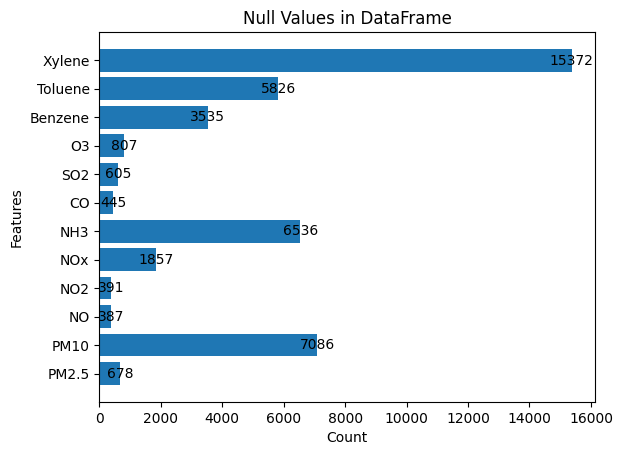

In [263]:
plt.barh(null_names, null_values)
plt.xlabel('Count')
plt.ylabel('Features')
plt.title('Null Values in DataFrame')
for i in range(len(null_values)): 
    plt.text(null_values[i], i, str(null_values[i]), color='black', ha="center", va="center")
plt.show()

In [264]:
#We can drop these columns as they have multicollinearity >0.6
#PM10 is having high number of null values
#NOx is having high number of null values
#Benzene was having least corrilation with AQI (target)
city_day.drop(columns=['PM10','NOx','Benzene'],inplace=True)

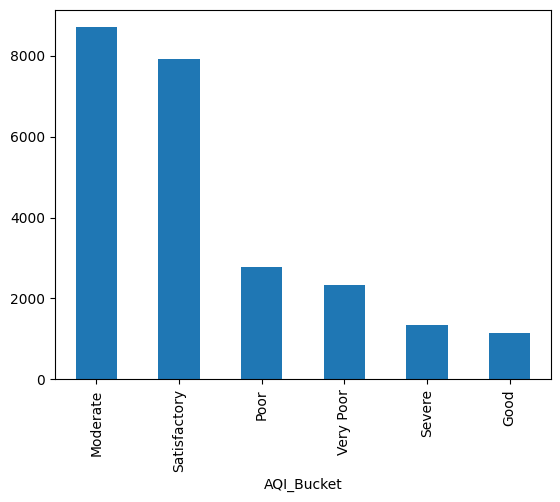

In [271]:
city_day['AQI_Bucket'].value_counts().plot(kind='bar')
plt.show()

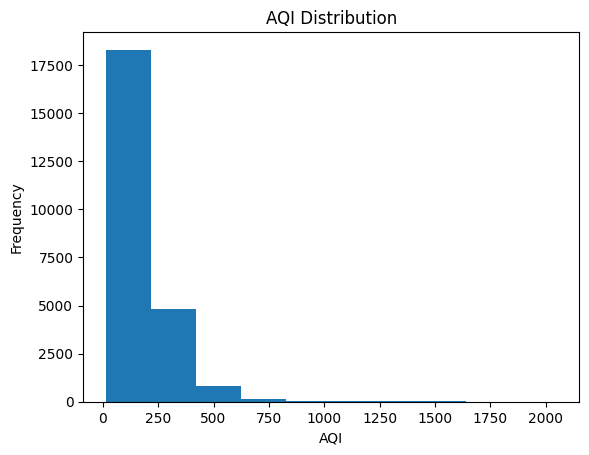

In [272]:
city_day['AQI'].plot(kind='hist')
plt.xlabel('AQI')
plt.title('AQI Distribution')
plt.show()

In [273]:
city_day.head()

,City,Date,PM2.5,NO,NO2,NH3,CO,SO2,O3,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-29,83.13,6.93,28.71,23.712258,6.93,49.52,59.76,0.00,3.14,209.0,Poor
1,Ahmedabad,2015-01-30,79.84,13.85,28.68,23.712258,13.85,48.49,97.07,0.00,4.81,328.0,Very Poor
2,Ahmedabad,2015-01-31,94.52,24.39,32.66,23.712258,24.39,67.39,111.33,0.01,7.67,514.0,Severe
3,Ahmedabad,2015-02-01,135.99,43.48,42.08,23.712258,43.48,75.23,102.70,0.04,25.87,782.0,Severe
4,Ahmedabad,2015-02-02,178.33,54.56,35.31,23.712258,54.56,55.04,107.38,0.06,35.61,914.0,Severe


# Outlier Treatment

In [274]:
def outlier(column,data):
    Q1=data[column].quantile(0.25)
    Q3=data[column].quantile(0.75)
    IQR=Q3-Q1
    upper_bound=Q3+1.5*IQR
    lower_bound=Q1-1.5*IQR

    return upper_bound,lower_bound

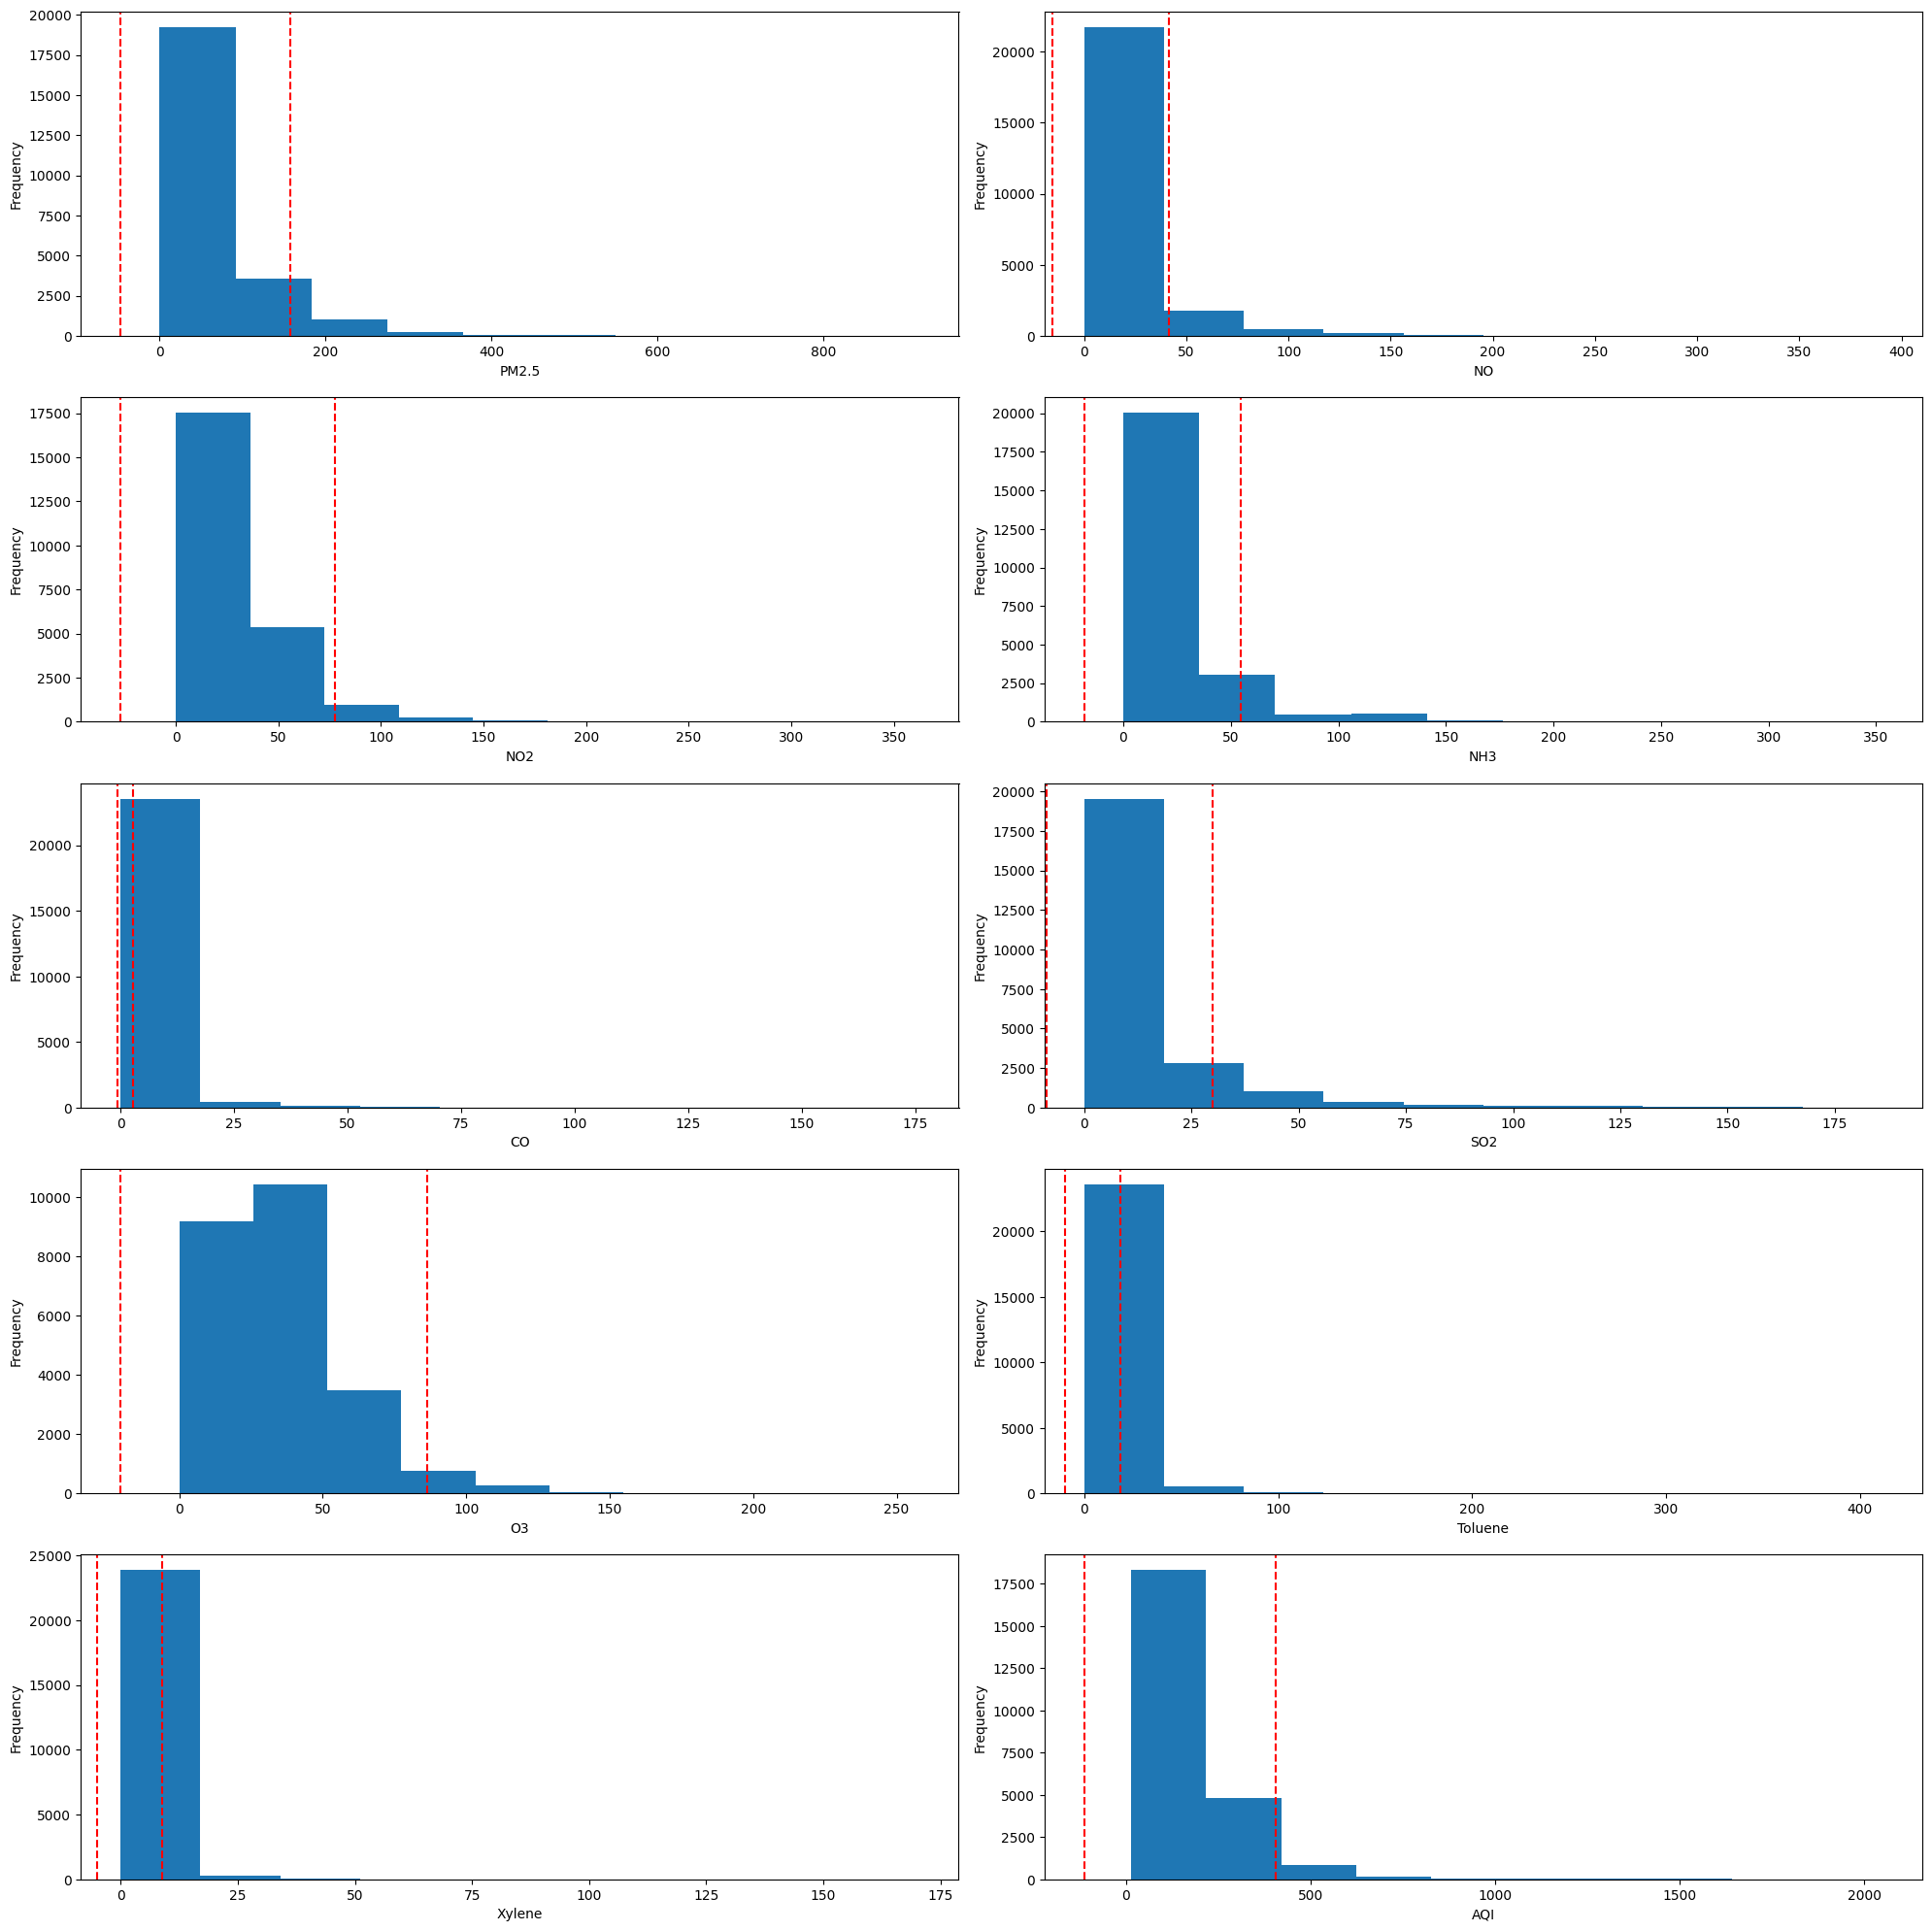

In [275]:
plt.figure(figsize=(20,20))
for index,col in zip(range(10),[ col for col in city_day.columns if city_day[col].dtypes=='float64']):
    plt.subplot(5,2,index+1)
    city_day[col].plot(kind='hist')
    # Add lines for the lower and upper bounds
    upper_bound,lower_bound=outlier(col,city_day)
    plt.axvline(x=lower_bound, color='red', linestyle='--', label=f'Lower Bound ({lower_bound})')
    plt.axvline(x=upper_bound, color='red', linestyle='--', label=f'Upper Bound ({upper_bound})')
    plt.xlabel(col)
    # Clip the data between upper bound and lower bound (removing outliers)
    city_day[col]=city_day[col].clip(upper=upper_bound,lower=lower_bound)
plt.tight_layout()
plt.show()

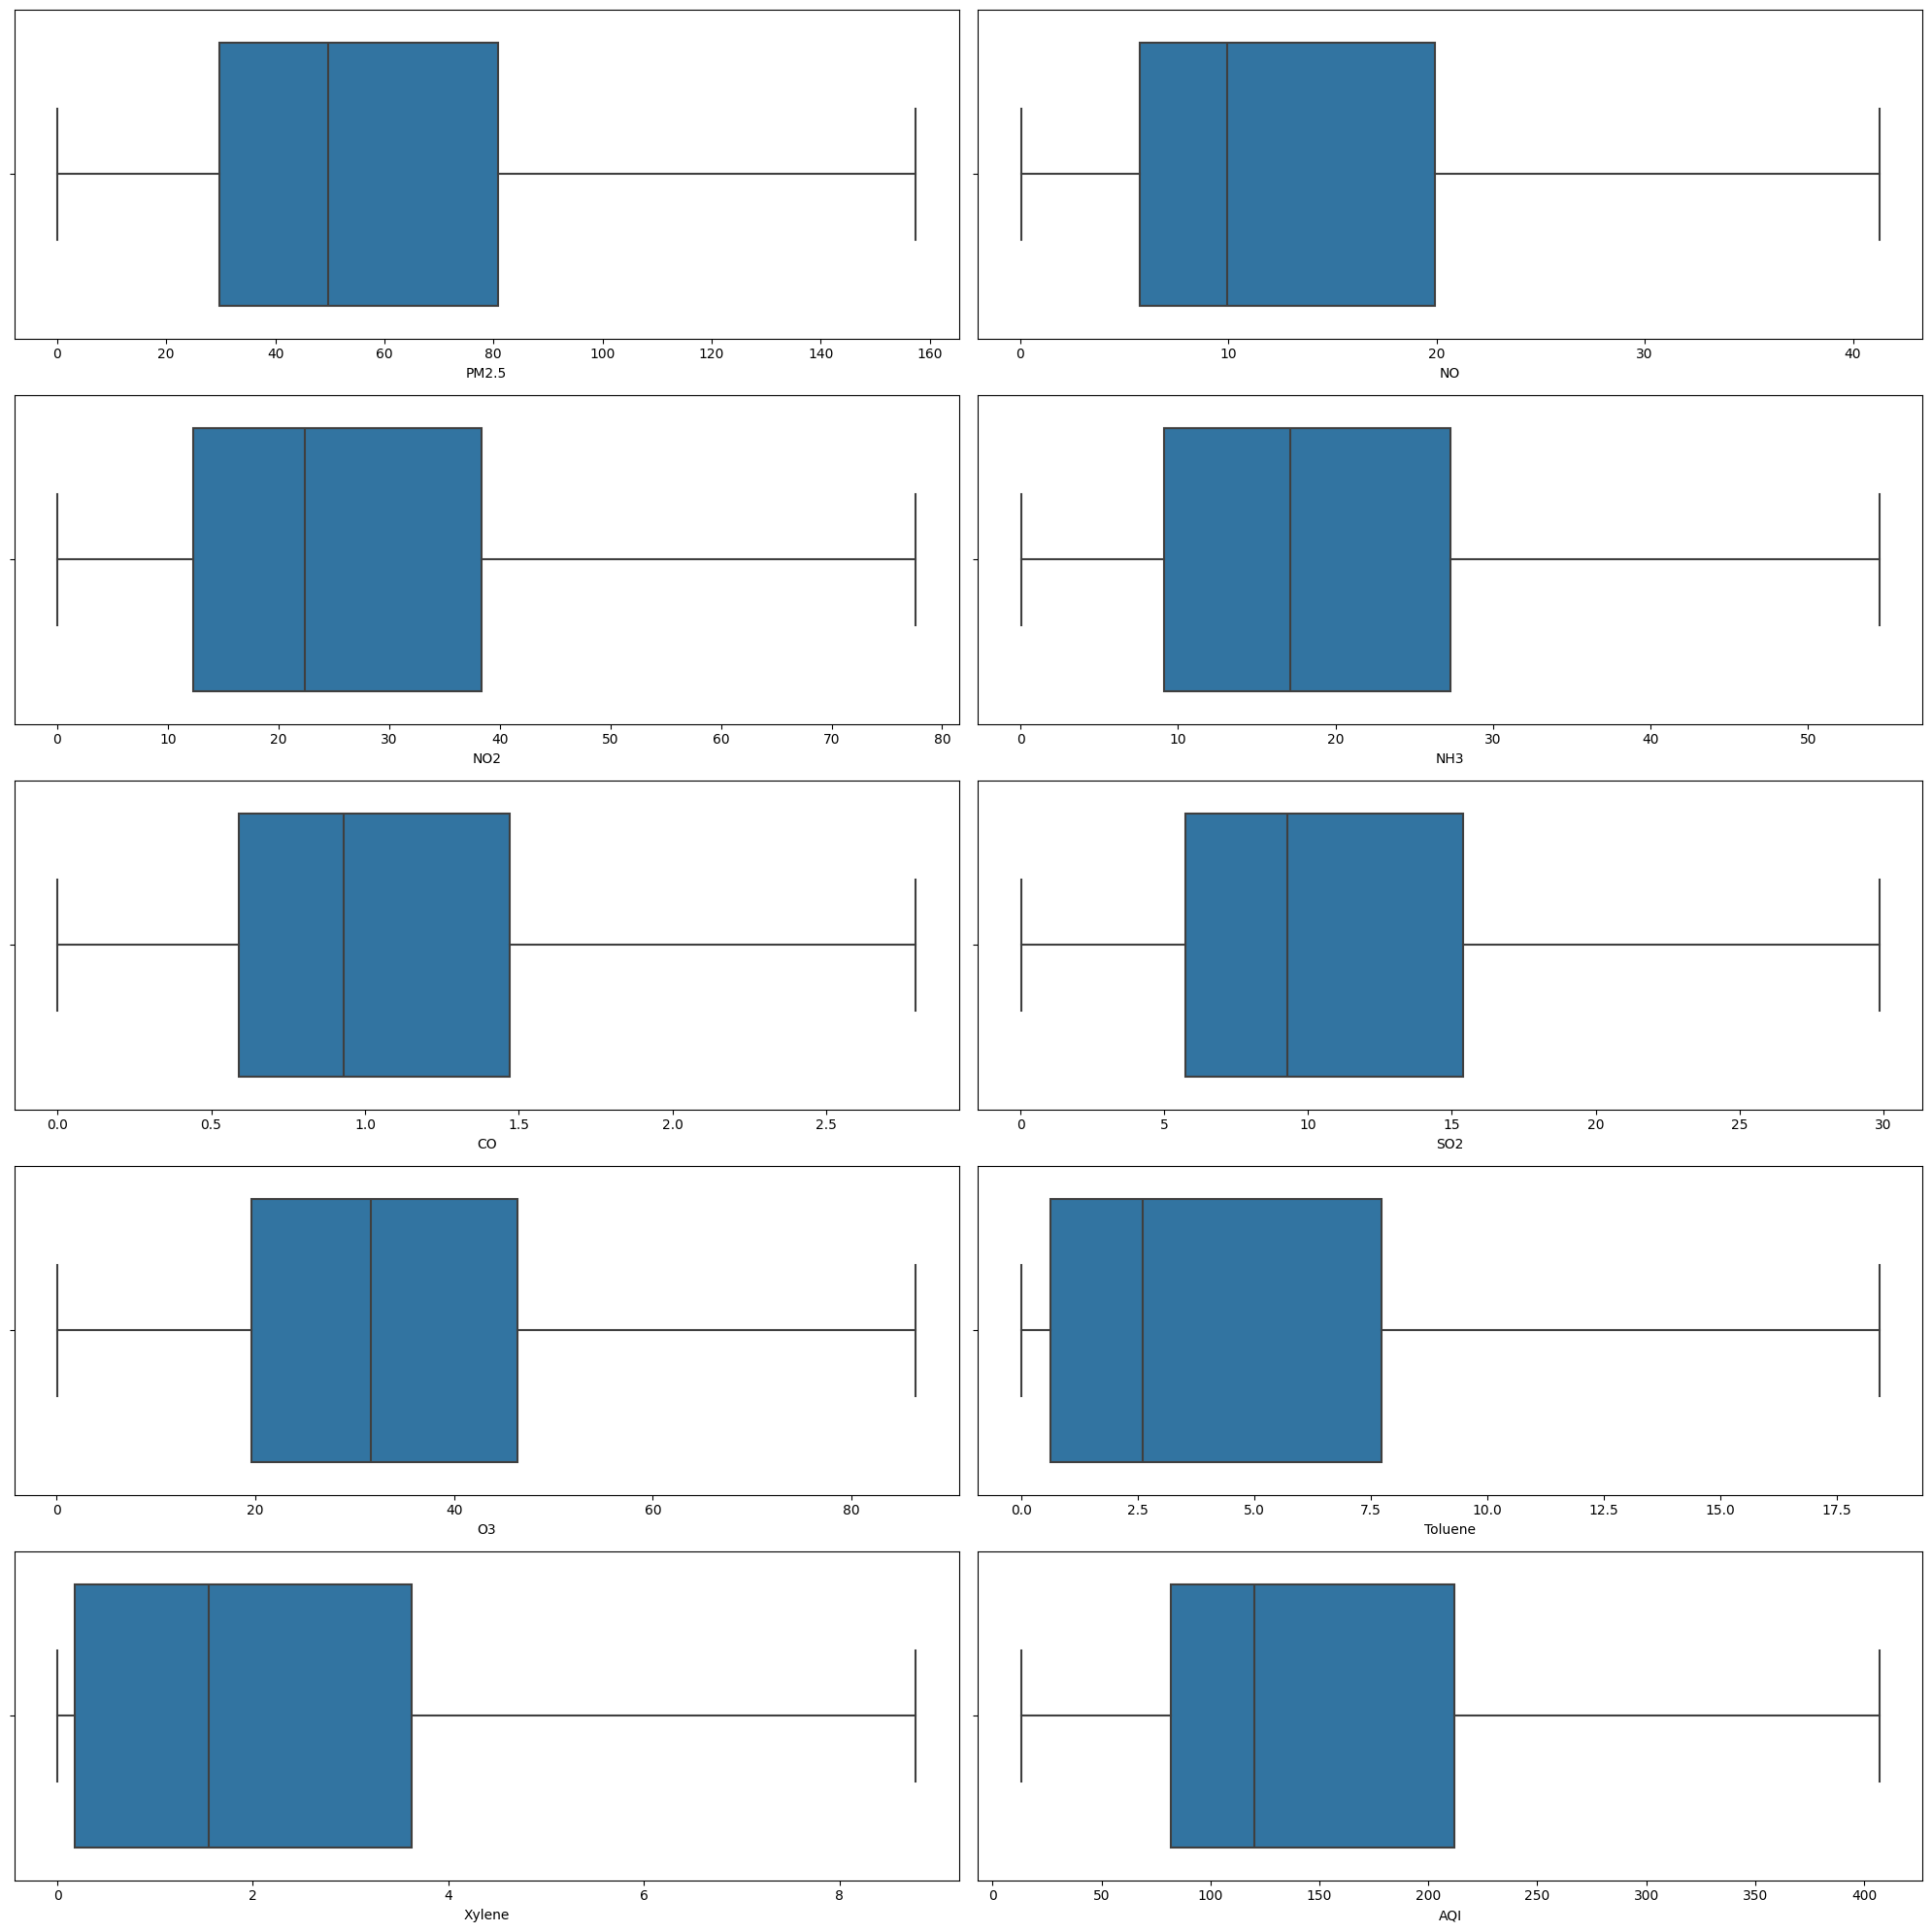

In [276]:
plt.figure(figsize=(20,20))
for index,col in zip(range(10),[ col for col in city_day.columns if city_day[col].dtypes=='float64']):
    plt.subplot(5,2,index+1)
    sns.boxplot(data=city_day,x=col)
plt.tight_layout()
plt.show()

# Data Transformation

In [ ]:
#For predicting AQI 'City' feature and date will not a good predictor so we can drop it
city_day.drop(columns=['City','Date'],inplace=True)

In [278]:
#Encoding AQI Bucket to see is there any relationship between AQI and AQI_Bucket
from sklearn.preprocessing import LabelEncoder
lr=LabelEncoder()
city_day['AQI_Bucket']=lr.fit_transform(city_day['AQI_Bucket'])
city_day.corr()

,PM2.5,NO,NO2,NH3,CO,SO2,O3,Toluene,Xylene,AQI,AQI_Bucket
PM2.5,1.000000,0.478037,0.440393,0.208195,0.367728,0.236702,0.200749,0.258015,-0.112362,0.836884,0.410301
NO,0.478037,1.000000,0.522443,0.218891,0.348699,0.317145,0.004557,0.274046,-0.006717,0.516749,0.258270
NO2,0.440393,0.522443,1.000000,0.287113,0.296313,0.319134,0.297926,0.495919,0.071857,0.496473,0.219095
NH3,0.208195,0.218891,0.287113,1.000000,0.118250,0.049495,0.118164,0.157313,0.033625,0.194120,0.083045
CO,0.367728,0.348699,0.296313,0.118250,1.000000,0.304767,0.057421,0.284248,0.087392,0.566849,0.251171
SO2,0.236702,0.317145,0.319134,0.049495,0.304767,1.000000,0.217778,0.311207,0.027093,0.390522,0.136781
O3,0.200749,0.004557,0.297926,0.118164,0.057421,0.217778,1.000000,0.220424,0.007968,0.206527,-0.016455
Toluene,0.258015,0.274046,0.495919,0.157313,0.284248,0.311207,0.220424,1.000000,0.102315,0.380266,0.156317
Xylene,-0.112362,-0.006717,0.071857,0.033625,0.087392,0.027093,0.007968,0.102315,1.000000,-0.077156,-0.054301
AQI,0.836884,0.516749,0.496473,0.194120,0.566849,0.390522,0.206527,0.380266,-0.077156,1.000000,0.501077


In [279]:
#We can drop AQI Bucket too as it does not supports much in prediction and it is just a hard coded feature
city_day.drop('AQI_Bucket',axis=1,inplace=True)

### View Data after all transformations and cleaning

In [280]:
city_day.head()

,PM2.5,NO,NO2,NH3,CO,SO2,O3,Toluene,Xylene,AQI
0,83.130,6.93,28.71,23.712258,2.79,29.87,59.7600,0.00,3.14,209.0
1,79.840,13.85,28.68,23.712258,2.79,29.87,86.4525,0.00,4.81,328.0
2,94.520,24.39,32.66,23.712258,2.79,29.87,86.4525,0.01,7.67,407.0
3,135.990,41.27,42.08,23.712258,2.79,29.87,86.4525,0.04,8.78,407.0
4,157.425,41.27,35.31,23.712258,2.79,29.87,86.4525,0.06,8.78,407.0


In [281]:
city_day.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24223 entries, 0 to 24849
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   PM2.5    24223 non-null  float64
 1   NO       24223 non-null  float64
 2   NO2      24223 non-null  float64
 3   NH3      24223 non-null  float64
 4   CO       24223 non-null  float64
 5   SO2      24223 non-null  float64
 6   O3       24223 non-null  float64
 7   Toluene  24223 non-null  float64
 8   Xylene   24223 non-null  float64
 9   AQI      24223 non-null  float64
dtypes: float64(10)
memory usage: 2.0 MB


In [282]:
city_day.describe()

,PM2.5,NO,NO2,NH3,CO,SO2,O3,Toluene,Xylene,AQI
count,24223.000000,24223.000000,24223.000000,24223.000000,24223.000000,24223.000000,24223.000000,24223.000000,24223.000000,24223.000000
mean,61.784021,14.553482,27.972019,20.681545,1.129694,11.864176,34.851972,5.317175,2.687207,159.995665
std,42.330599,12.146717,19.809348,15.343814,0.773281,8.327855,19.924220,6.180619,3.122905,105.181612
min,0.040000,0.030000,0.010000,0.020000,0.000000,0.010000,0.100000,0.000000,0.000000,13.000000
25%,29.750000,5.720000,12.250000,9.120000,0.590000,5.720000,19.640000,0.630000,0.180000,82.000000
50%,49.770000,9.960000,22.420000,17.120000,0.930000,9.270000,31.630000,2.620000,1.550000,120.000000
75%,80.820000,19.940000,38.395000,27.280000,1.470000,15.380000,46.365000,7.740000,3.620000,212.000000
max,157.425000,41.270000,77.612500,54.520000,2.790000,29.870000,86.452500,18.405000,8.780000,407.000000


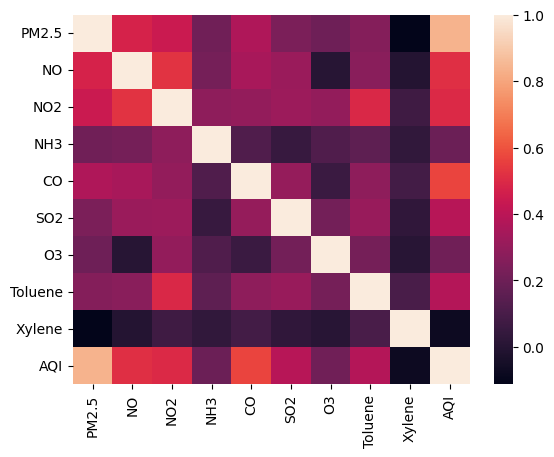

In [283]:
#Correlation Heatmap
sns.heatmap(city_day.corr())
plt.show()

# Model Training

In [284]:
from sklearn.preprocessing import StandardScaler,normalize
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.metrics import auc,mean_squared_error,r2_score

X=city_day.drop('AQI',axis=1)
Y=city_day['AQI']

x_train,x_test,y_train,y_test=train_test_split(X,Y,train_size=0.8,random_state=123)

x_ss=StandardScaler()
x_train=x_ss.fit_transform(x_train)
x_test=x_ss.transform(x_test)

y_ss=StandardScaler()
y_train=y_ss.fit_transform(y_train.values.reshape(-1,1))
y_test=y_ss.transform(y_test.values.reshape(-1,1))

### Linear Regression

In [285]:
lr=LinearRegression()
lr.fit(x_train,y_train)
lr_pred=lr.predict(x_test)

In [286]:
#Linear Regression Performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
y_true=y_test
y_pred=lr_pred

mae = mean_absolute_error(y_true, y_pred)
print("Mean Absolute Error (MAE):", mae)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_true, y_pred)
print("Mean Squared Error (MSE):", mse)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)

# Calculate Coefficient of Determination (R-squared)
r2 = r2_score(y_true, y_pred)
print("Coefficient of Determination (R-squared):", r2)

Mean Absolute Error (MAE): 0.29625433255157174
Mean Squared Error (MSE): 0.1796327373294197
Root Mean Squared Error (RMSE): 0.42383102450082594
Coefficient of Determination (R-squared): 0.8134182796884204


### Ridge Regression

In [287]:
# Initialize Ridge Regression model
ridge_model = Ridge(alpha=.001)
# Train the model
ridge_model.fit(x_train, y_train)
# Make predictions
ridge_predictions = ridge_model.predict(x_test)

In [288]:
#Linear Regression Performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
y_true=y_test
y_pred=ridge_predictions

mae = mean_absolute_error(y_true, y_pred)
print("Mean Absolute Error (MAE):", mae)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_true, y_pred)
print("Mean Squared Error (MSE):", mse)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)

# Calculate Coefficient of Determination (R-squared)
r2 = r2_score(y_true, y_pred)
print("Coefficient of Determination (R-squared):", r2)

Mean Absolute Error (MAE): 0.29625433313158395
Mean Squared Error (MSE): 0.17963273715265815
Root Mean Squared Error (RMSE): 0.4238310242922976
Coefficient of Determination (R-squared): 0.8134182798720199


### Lasso Regression

In [289]:
# Initialize Lasso Regression model
lasso_model = Lasso(alpha=.0001)
# Train the model
lasso_model.fit(x_train, y_train)
# Make predictions
lasso_predictions = lasso_model.predict(x_test)

In [290]:
#Linear Regression Performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
y_true=y_test
y_pred=lasso_predictions

mae = mean_absolute_error(y_true, y_pred)
print("Mean Absolute Error (MAE):", mae)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_true, y_pred)
print("Mean Squared Error (MSE):", mse)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)

# Calculate Coefficient of Determination (R-squared)
r2 = r2_score(y_true, y_pred)
print("Coefficient of Determination (R-squared):", r2)

Mean Absolute Error (MAE): 0.29622739863709313
Mean Squared Error (MSE): 0.17962758403084636
Root Mean Squared Error (RMSE): 0.423824945031373
Coefficient of Determination (R-squared): 0.8134236323392088


### Hyper Parameter Tuning

In [291]:
linear_regression_hyperparams = {
    "fit_intercept": [True, False],
    "copy_X": [True, False],
    "n_jobs": [None, -1]
}

ridge_regression_hyperparams = {
    "alpha": [0.1, 1.0, 10.0, 100.0],
    "fit_intercept": [True, False],
    "copy_X": [True, False],
    "max_iter": [None, 100, 1000],
    "tol": [1e-4, 1e-3, 1e-2],
    "solver": ["auto", "svd", "cholesky", "lsqr", "sparse_cg", "sag", "saga"]
}

lasso_regression_hyperparams = {
    "alpha": [0.1, 1.0, 10.0, 100.0],
    "fit_intercept": [True, False],
    "precompute": [True, False, "auto"],
    "copy_X": [True, False],
    "max_iter": [1000, 2000, 3000],
    "tol": [1e-4, 1e-3, 1e-2],
    "warm_start": [True, False],
    "positive": [True, False],
    "selection": ["cyclic", "random"]
}

In [292]:
# Initialize Ridge Regression model
ridge_model = Ridge()
lasso_model = Lasso()
linear_model = LinearRegression()

# Initialize GridSearchCV
ridge_grid_search = GridSearchCV(estimator=ridge_model, param_grid=ridge_regression_hyperparams, cv=5, scoring='neg_mean_squared_error')
lasso_grid_search = GridSearchCV(estimator=lasso_model, param_grid=lasso_regression_hyperparams, cv=5, scoring='neg_mean_squared_error')
linear_grid_search = GridSearchCV(estimator=linear_model, param_grid=linear_regression_hyperparams, cv=5, scoring='neg_mean_squared_error')

# Fit the model
ridge_grid_search.fit(x_train, y_train)
lasso_grid_search.fit(x_train, y_train)
linear_grid_search.fit(x_train, y_train)

# Best parameters and best score
print(f"Best Ridge parameters: {ridge_grid_search.best_params_}")
print(f"Best Ridge score: {ridge_grid_search.best_score_}")
print(f"Best Lasso parameters: {lasso_grid_search.best_params_}")
print(f"Best Lasso score: {lasso_grid_search.best_score_}")
print(f"Best Linear parameters: {linear_grid_search.best_params_}")
print(f"Best Linear score: {linear_grid_search.best_score_}")


# Make predictions with the best model
ridge_best_model = ridge_grid_search.best_estimator_
ridge_predictions = ridge_best_model.predict(x_test)
lasso_best_model = lasso_grid_search.best_estimator_
lasso_predictions = lasso_best_model.predict(x_test)
linear_best_model = linear_grid_search.best_estimator_
linear_predictions = linear_best_model.predict(x_test)


Best Ridge parameters: {'alpha': 1.0, 'copy_X': True, 'fit_intercept': False, 'max_iter': 1000, 'solver': 'sag', 'tol': 0.01}
Best Ridge score: -0.19410463117564197
Best Lasso parameters: {'alpha': 0.1, 'copy_X': True, 'fit_intercept': False, 'max_iter': 1000, 'positive': True, 'precompute': True, 'selection': 'random', 'tol': 0.01, 'warm_start': True}
Best Lasso score: -0.21758949299225544
Best Linear parameters: {'copy_X': True, 'fit_intercept': False, 'n_jobs': None}
Best Linear score: -0.1941951589233707


### Model Evaluation

In [ ]:
#Ridge Regression Performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
y_true=y_test
y_pred=ridge_predictions

mae = mean_absolute_error(y_true, y_pred)
print("Mean Absolute Error (MAE):", mae)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_true, y_pred)
print("Mean Squared Error (MSE):", mse)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)

# Calculate Coefficient of Determination (R-squared)
r2 = r2_score(y_true, y_pred)
print("Coefficient of Determination (R-squared):", r2)

Mean Absolute Error (MAE): 0.29791082382839185
Mean Squared Error (MSE): 0.17994047388979537
Root Mean Squared Error (RMSE): 0.424193910717487
Coefficient of Determination (R-squared): 0.8130986385267297


In [ ]:
#Lasso Regression Performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
y_true=y_test
y_pred=lasso_predictions

mae = mean_absolute_error(y_true, y_pred)
print("Mean Absolute Error (MAE):", mae)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_true, y_pred)
print("Mean Squared Error (MSE):", mse)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)

# Calculate Coefficient of Determination (R-squared)
r2 = r2_score(y_true, y_pred)
print("Coefficient of Determination (R-squared):", r2)

Mean Absolute Error (MAE): 0.3074246855489308
Mean Squared Error (MSE): 0.2008183105210943
Root Mean Squared Error (RMSE): 0.4481275605462069
Coefficient of Determination (R-squared): 0.7914131555075168


In [ ]:
#Linear Regression Performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
y_true=y_test
y_pred=linear_predictions

mae = mean_absolute_error(y_true, y_pred)
print("Mean Absolute Error (MAE):", mae)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_true, y_pred)
print("Mean Squared Error (MSE):", mse)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)

# Calculate Coefficient of Determination (R-squared)
r2 = r2_score(y_true, y_pred)
print("Coefficient of Determination (R-squared):", r2)

Mean Absolute Error (MAE): 0.29625433255157174
Mean Squared Error (MSE): 0.1796327373294197
Root Mean Squared Error (RMSE): 0.42383102450082594
Coefficient of Determination (R-squared): 0.8134182796884204


### Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(n_jobs=-1,random_state=123,n_estimators=500)
rf.fit(x_train,y_train)
rf_pred=rf.predict(x_test)

In [ ]:
#RandomForestRegressor Performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
y_true=y_test
y_pred=rf_pred

mae = mean_absolute_error(y_true, y_pred)
print("Mean Absolute Error (MAE):", mae)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_true, y_pred)
print("Mean Squared Error (MSE):", mse)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)

# Calculate Coefficient of Determination (R-squared)
r2 = r2_score(y_true, y_pred)
print("Coefficient of Determination (R-squared):", r2)

### ANN

In [193]:
from keras.layers import Dense,Dropout
from keras.models import Sequential
ann_model=Sequential()
ann_model.add(Dense(50,input_shape=(x_train.shape[1],),activation='relu'))
ann_model.add(Dropout(0.2))
ann_model.add(Dense(50,activation='relu'))
ann_model.add(Dropout(0.2))
ann_model.add(Dense(50,activation='relu'))
ann_model.add(Dropout(0.2))
ann_model.add(Dense(1,activation='linear'))

ann_model.compile(optimizer='adam',metrics=['mse'],loss='mean_squared_error')

In [194]:
ann_model.summary()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_90 (Dense)            (None, 50)                500       
                                                                 
 dropout_29 (Dropout)        (None, 50)                0         
                                                                 
 dense_91 (Dense)            (None, 50)                2550      
                                                                 
 dropout_30 (Dropout)        (None, 50)                0         
                                                                 
 dense_92 (Dense)            (None, 50)                2550      
                                                                 
 dropout_31 (Dropout)        (None, 50)                0         
                                                                 
 dense_93 (Dense)            (None, 1)               

In [195]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((19378, 9), (4845, 9), (19378, 1), (4845, 1))

In [196]:
history=ann_model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=50,batch_size=64)

Epoch 1/50
303/303 [==============================] - 3s 6ms/step - loss: 0.3103 - mse: 0.3103 - val_loss: 0.1417 - val_mse: 0.1417
Epoch 2/50
303/303 [==============================] - 1s 5ms/step - loss: 0.1911 - mse: 0.1911 - val_loss: 0.1215 - val_mse: 0.1215
Epoch 3/50
303/303 [==============================] - 1s 5ms/step - loss: 0.1744 - mse: 0.1744 - val_loss: 0.1309 - val_mse: 0.1309
Epoch 4/50
303/303 [==============================] - 2s 5ms/step - loss: 0.1619 - mse: 0.1619 - val_loss: 0.1285 - val_mse: 0.1285
Epoch 5/50
303/303 [==============================] - 1s 5ms/step - loss: 0.1542 - mse: 0.1542 - val_loss: 0.1331 - val_mse: 0.1331
Epoch 6/50
303/303 [==============================] - 1s 5ms/step - loss: 0.1504 - mse: 0.1504 - val_loss: 0.1286 - val_mse: 0.1286
Epoch 7/50
303/303 [==============================] - 1s 5ms/step - loss: 0.1484 - mse: 0.1484 - val_loss: 0.1497 - val_mse: 0.1497
Epoch 8/50
303/303 [==============================] - 1s 5ms/step - loss: 0.

#### Model Evaluation

In [199]:
ann_model.evaluate(x_test,y_test)

152/152 [==============================] - 0s 3ms/step - loss: 0.1166 - mse: 0.1166


[0.11657986044883728, 0.11657986044883728]

#### Scores VS Epochs

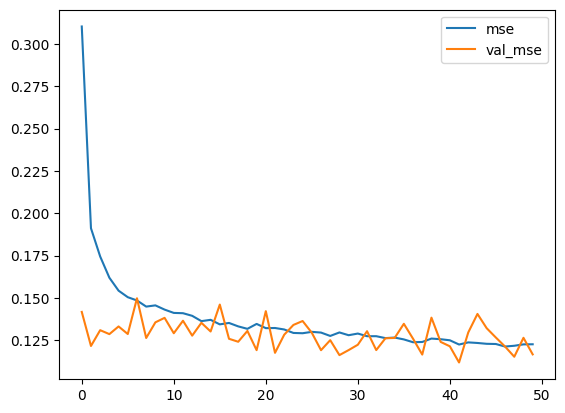

In [197]:
plt.plot(history.history['mse'],label='mse')
plt.plot(history.history['val_mse'],label='val_mse')
plt.legend()
plt.show()

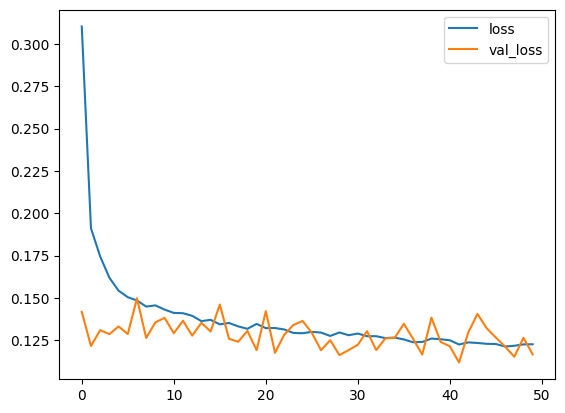

In [198]:
plt.plot(history.history['loss'],label='loss')
plt.plot(history.history['val_loss'],label='val_loss')
plt.legend()
plt.show()